In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy

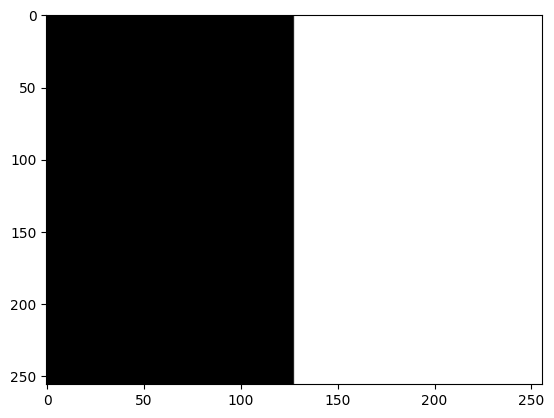

In [19]:

# Define image dimensions
width = 256
height = 256

# Create a 2D array representing the gradient
image = np.zeros((height, width))

# Populate the array with the gradient values
for i in range(width):
    if i < width/2:
        image[:, i] = 0.0
    else:
        image[:, i] = 1.0

# Plot the image
plt.imshow(image, cmap='gray', aspect='auto')
plt.show()

Text(0, 0.5, 'Pixel count')

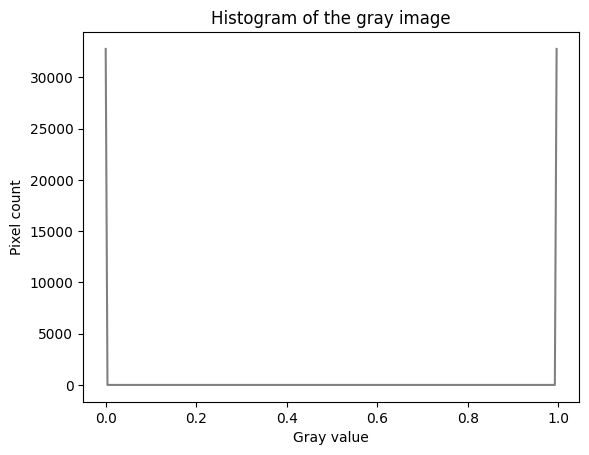

In [37]:
# tuple to select colors of each channel line
colors = ("gray",)

# create the histogram plot, with three lines, one for each color
plt.figure()
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(image[:, :], bins=256)
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Histogram of the gray image")
plt.xlabel("Gray value")
plt.ylabel("Pixel count")

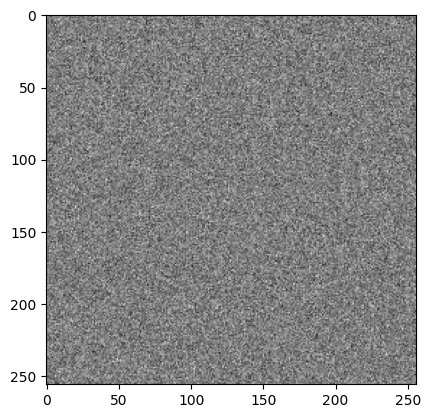

In [20]:
# add Gaussian White Noise
row,col= image.shape
ch = 1
noise_mean = 0
noise_var = 1
noise_std = noise_var ** 0.5
gauss = np.random.normal(0,0.1,(row,col))
noise = gauss.reshape(row,col)
noisy_image = image + noise

plt.imshow(noise, cmap='gray')

Text(0, 0.5, 'Pixel count')

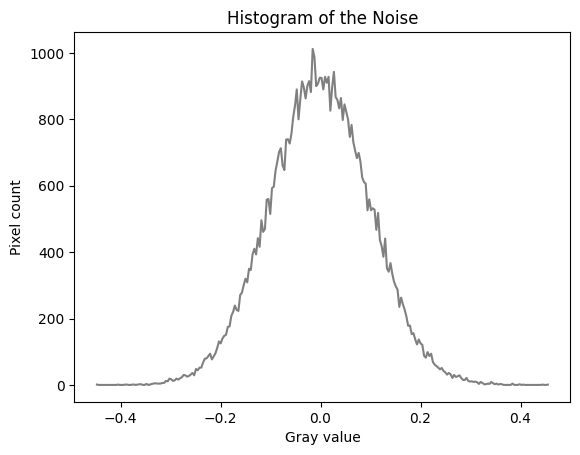

In [39]:
# tuple to select colors of each channel line
colors = ("gray",)

# create the histogram plot, with three lines, one for each color
plt.figure()
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(noise[:, :], bins=256)
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Histogram of the Noise")
plt.xlabel("Gray value")
plt.ylabel("Pixel count")

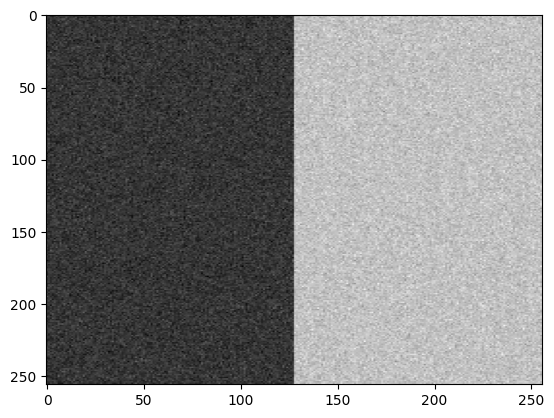

In [21]:

plt.imshow(noisy_image, cmap='gray', aspect = 'auto')

Text(0, 0.5, 'Pixel count')

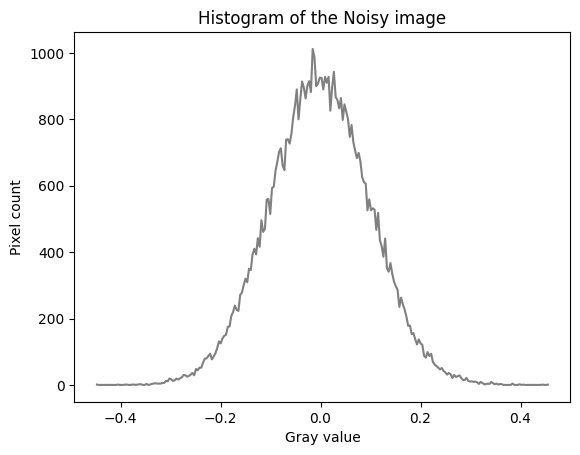

In [40]:
# tuple to select colors of each channel line
colors = ("gray",)

# create the histogram plot, with three lines, one for each color
plt.figure()
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(noise[:, :], bins=256)
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Histogram of the Noisy image")
plt.xlabel("Gray value")
plt.ylabel("Pixel count")

In [51]:
filter_kernel = [[[1,-1]], [[1], [-1]]]

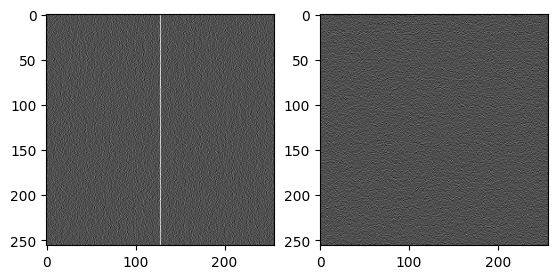

In [53]:
plt.figure(figsize = (10,3))

d_x_y = []

for i in range(len(filter_kernel)):
    plt.subplot(1,3,i+1)
    res = scipy.signal.convolve2d(noisy_image, filter_kernel[i],
                                  mode='same', boundary='fill', fillvalue=0)
    d_x_y.append(res)
    plt.imshow(res, cmap='gray', aspect = 'auto')


# plt.subplot(1,3,2)
# res = scipy.signal.convolve2d(noisy_image, filter_kernel,
#                               mode='same', boundary='fill', fillvalue=0)
# plt.imshow(res, cmap='gray', aspect = 'auto')

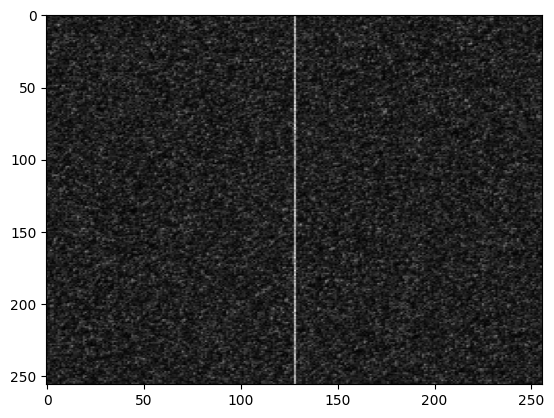

In [56]:
mag = np.sqrt((d_x_y[0]**2) + (d_x_y[1]**2))
plt.imshow(mag, cmap='gray', aspect = 'auto')